In [49]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv('database_cities.csv')

/tmp/ipykernel_455/2791066832.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('database_cities.csv')


In [51]:
df=df[['code_commune_INSEE','Distance_y','Distance_x','Population','PrixMoyen_M2','statut','s1','s2','s3','s4','s5']]

In [52]:
df

,code_commune_INSEE,Distance_y,Distance_x,Population,PrixMoyen_M2,statut,s1,s2,s3,s4,s5
0,01001,18.317875,48.593034,725.0,1938.0,0.0,GI,FZ,MN,OQ,RU
1,01002,26.858520,41.130212,167.0,1130.0,0.0,OQ,GI,BE,MN,RU
2,01004,29.282985,34.282618,11432.0,2005.0,0.0,GI,OQ,FZ,MN,RU
3,01005,26.518172,32.350317,1407.0,2442.0,0.0,GI,FZ,OQ,MN,RU
4,01006,32.116108,39.974384,86.0,1155.0,0.0,FZ,MN,GI,RU,BE
...,...,...,...,...,...,...,...,...,...,...,...
35503,95676,18.348081,48.955223,428.0,2150.0,0.0,GI,FZ,LZ,OQ,BE
35504,95678,22.467912,23.613028,775.0,3343.0,0.0,GI,MN,FZ,RU,JZ
35505,95680,12.195536,10.660258,26143.0,2449.0,0.0,GI,FZ,MN,OQ,RU
35506,95682,15.544250,13.889692,168.0,2741.0,0.0,GI,FZ,MN,JZ,RU


In [53]:
X=df[['Distance_y','Distance_x','Population','PrixMoyen_M2','statut']]
X[X.isna().any(axis=1)]

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut
52,30.226509,56.495614,105.0,NaN,0.0
82,37.102548,69.452692,2657.0,NaN,0.0
88,30.789225,52.799409,176.0,NaN,0.0
111,39.975718,47.393657,726.0,NaN,0.0
129,17.893487,67.737684,597.0,NaN,0.0
...,...,...,...,...,...
34965,70.172395,112.709217,316.0,NaN,0.0
35037,0.917858,48.340703,250.0,NaN,0.0
35122,16.062473,11.175276,13965.0,NaN,0.0
35134,45.480703,49.372808,182.0,NaN,0.0


In [54]:
X.isnull().sum()

Distance_y        0
Distance_x        0
Population        0
PrixMoyen_M2    913
statut            0
dtype: int64

In [55]:
X['PrixMoyen_M2'].median()

1234.0

In [56]:
X.PrixMoyen_M2.replace(np.nan, X.PrixMoyen_M2.median(),inplace=True)

/tmp/ipykernel_455/681099089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.PrixMoyen_M2.replace(np.nan, X.PrixMoyen_M2.median(),inplace=True)


In [57]:
X.iloc[:,1]

0        48.593034
1        41.130212
2        34.282618
3        32.350317
4        39.974384
           ...    
35503    48.955223
35504    23.613028
35505    10.660258
35506    13.889692
35507    44.470485
Name: Distance_x, Length: 35508, dtype: float64

<AxesSubplot:>

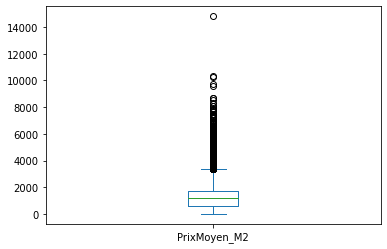

In [58]:
X.iloc[:,3].plot(kind='box')

In [59]:
X.iloc[:,3].min()

0.0

In [60]:
X[X.iloc[:,3]==0]

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut
16,40.863956,41.423796,15.0,0.0,0.0
19,13.991411,74.497739,69.0,0.0,0.0
110,28.522592,46.702407,73.0,0.0,0.0
124,32.289819,84.622151,406.0,0.0,0.0
153,31.101822,71.075523,763.0,0.0,0.0
...,...,...,...,...,...
35367,10.419190,8.838509,61.0,0.0,0.0
35371,4.628566,3.608239,218.0,0.0,0.0
35386,3.360933,2.277847,60.0,0.0,0.0
35419,14.036480,12.512457,177.0,0.0,0.0


In [61]:
X.isnull().sum()

Distance_y      0
Distance_x      0
Population      0
PrixMoyen_M2    0
statut          0
dtype: int64

In [63]:
km = KMeans(n_clusters=3)
km.fit(X).inertia_

65494411167.37845

In [65]:
wcss = []
clusters = list(range(1, 40))
for K in clusters:
    wcss.append(KMeans(n_clusters=K, random_state=42).fit(X).inertia_)
wcss

[267920692576.8299,
 107949744563.29387,
 65494411167.37845,
 48003849555.25225,
 35294011299.67748,
 28684190880.035534,
 23279748108.458015,
 19769800375.4498,
 17480205518.36946,
 15405968274.588856,
 14142120677.185917,
 13154377939.690306,
 12178304360.273397,
 11267629162.39406,
 10566471060.349846,
 9915495832.45117,
 9352383119.412632,
 8875619129.906641,
 8339193325.255684,
 7944347645.995437,
 7599376094.28242,
 7291835238.882543,
 6990121047.473831,
 6719667100.490905,
 6442957902.801475,
 6214775125.827593,
 6005483801.405473,
 5760359418.974823,
 5593440139.289308,
 5387854504.381149,
 5237920378.414808,
 5089892317.727983,
 4971578144.584652,
 4831626042.433708,
 4679382179.148752,
 4556967124.584243,
 4420682101.259345,
 4302782296.346424,
 4197416713.196898]

<AxesSubplot:>

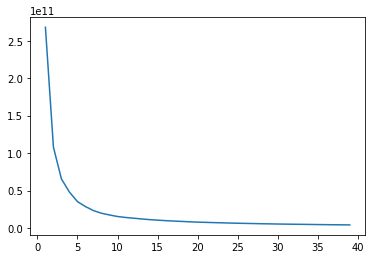

In [67]:
import seaborn as sns
sns.lineplot(x=clusters,y=wcss)

In [68]:
km2 = KMeans(n_clusters=15,random_state=42)
km2.fit(X)
y_pred2=km2.predict(X)
y_pred2

array([ 2, 11, 14, ...,  3, 12, 12], dtype=int32)